===== PowerPulse Forecast Results =====
Mean Absolute Error (MAE): 2.34
Root Mean Squared Error (RMSE): 2.89
R² Score: 0.71


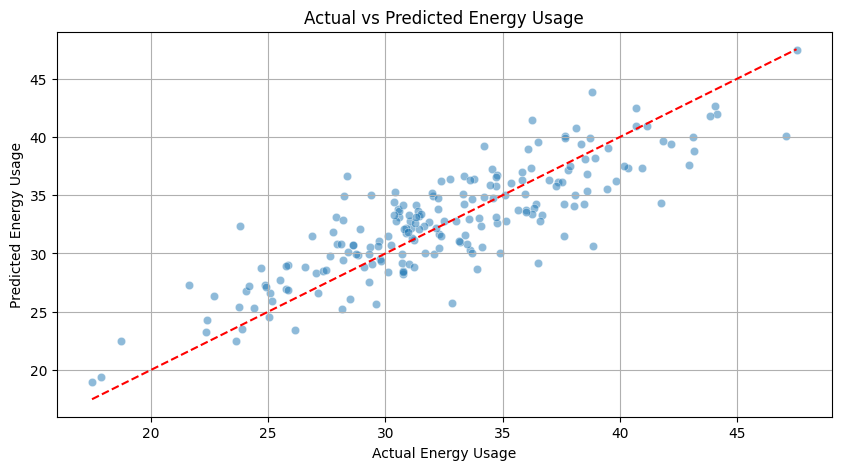

In [4]:
# PowerPulse: Household Energy Usage Forecast

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Simulate a dataset
np.random.seed(42)
n = 1000

data = pd.DataFrame({
    'temperature': np.random.normal(25, 5, n),
    'humidity': np.random.normal(50, 10, n),
    'day_of_week': np.random.randint(0, 7, n),
    'hour': np.random.randint(0, 24, n),
})

# Simulate energy usage with a formula + noise
data['energy_usage'] = (
    0.5 * data['temperature'] +
    0.3 * data['humidity'] +
    0.1 * data['day_of_week'] +
    0.4 * data['hour'] +
    np.random.normal(0, 3, n)
)

# 2. Data Preprocessing
features = ['temperature', 'humidity', 'day_of_week', 'hour']
X = data[features]
y = data['energy_usage']

# 3. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Model Training
model = LinearRegression()
model.fit(X_train, y_train)

# 5. Predictions
y_pred = model.predict(X_test)

# 6. Evaluation Metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

# 7. Output results
print("===== PowerPulse Forecast Results =====")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R² Score: {r2:.2f}")

# 8. Visualization
plt.figure(figsize=(10, 5))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.5)
plt.xlabel("Actual Energy Usage")
plt.ylabel("Predicted Energy Usage")
plt.title("Actual vs Predicted Energy Usage")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # Diagonal line
plt.grid()
plt.show()



===== Feature Importance =====
       Feature  Coefficient
0  temperature     0.497705
3         hour     0.414135
1     humidity     0.307125
2  day_of_week     0.132059


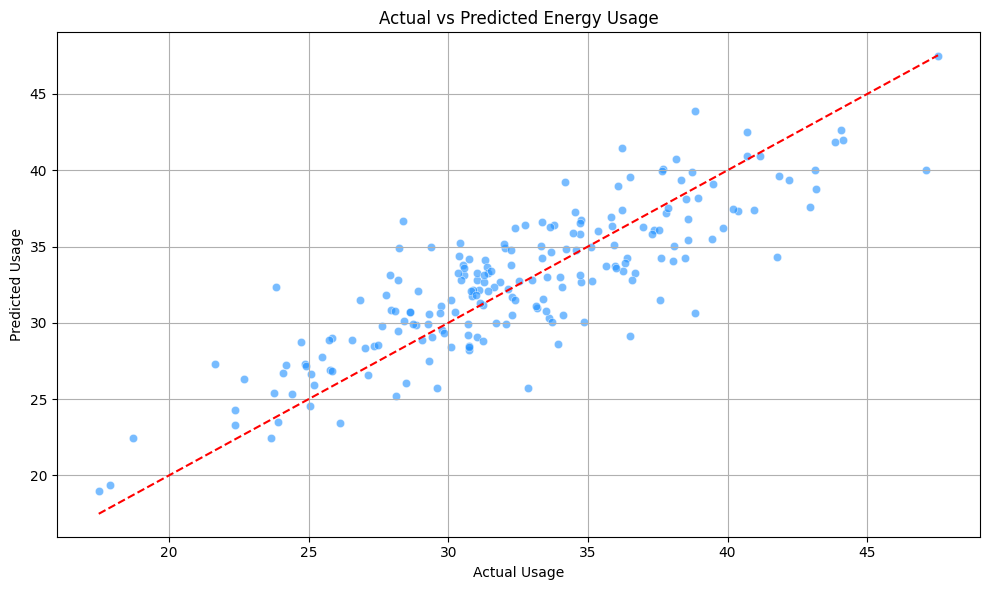

/tmp/ipython-input-5-2188359778.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')


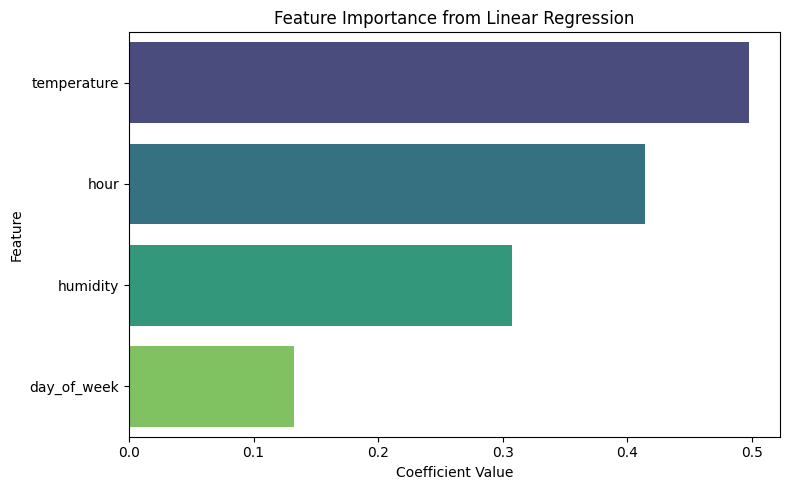

In [5]:

#Feature Importance (Linear Regression Coefficients)
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Coefficient': model.coef_
}).sort_values(by='Coefficient', ascending=False)

print("\n===== Feature Importance =====")
print(feature_importance)

# 8. Visualization: Actual vs Predicted
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, color='dodgerblue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.title('Actual vs Predicted Energy Usage')
plt.xlabel('Actual Usage')
plt.ylabel('Predicted Usage')
plt.grid(True)
plt.tight_layout()
plt.show()

# 9. Visualization: Feature Importance Bar Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Coefficient', y='Feature', data=feature_importance, palette='viridis')
plt.title('Feature Importance from Linear Regression')
plt.xlabel('Coefficient Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
